In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [5]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [11]:
tickers_change = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1]
tickers_change

Date  Added                                Removed  \
                  Date Ticker                       Security  Ticker   
0        June 21, 2022    KDP               Keurig Dr Pepper  UA/UAA   
1        June 21, 2022     ON               ON Semiconductor    IPGP   
2         June 8, 2022   VICI                Vici Properties    CERN   
3        April 4, 2022    CPT          Camden Property Trust    PBCT   
4        March 2, 2022    MOH              Molina Healthcare    INFO   
..                 ...    ...                            ...     ...   
301       June 9, 1999    WLP                      Wellpoint     HFI   
302  December 11, 1998    FSR                        Firstar     LDW   
303  December 11, 1998    CCL                 Carnival Corp.     GRE   
304  December 11, 1998   CPWR                      Compuware     SUN   
305      June 17, 1997    CCI  Countrywide Credit Industries     USL   

                                \
                      Security   
0                 Under Armour   
1                IPG Photonics   
2                       Cerner   
3    People's United Financial   
4                   IHS Markit   
..                         ...   
301   Harnischfeger Industries   
302                      Amoco   
303                 General Re   
304                 SunAmerica   
305                     USLife   

                                                Reason  
                                                Reason  
0                     Market capitalization change.[4]  
1                     Market capitalization change.[4]  
2    S&P 500 constituent Oracle Corp. acquired Cern...  
3    S&P 500 constituent M&T Bank Corp. acquired Pe...  
4    S&P 500 constituent S&P Global Inc. acquired I...  
..                                                 ...  
301           Harnischfeger filed for bankruptcy.[231]  
302            British Petroleum purchased Amoco.[232]  
303      Berkshire Hathaway purchased General Re.[232]  
304                     AIG purchased SunAmerica.[232]  
305                          AIG acquired USLife.[233]  

[306 rows x 6 columns]

In [15]:
pd.to_datetime(tickers_change.Date.Date)

0     2022-06-21
1     2022-06-21
2     2022-06-08
3     2022-04-04
4     2022-03-02
         ...    
301   1999-06-09
302   1998-12-11
303   1998-12-11
304   1998-12-11
305   1997-06-17
Name: Date, Length: 306, dtype: datetime64[ns]

In [68]:
tickers_change[pd.to_datetime(tickers_change.Date.Date) >='2018-01-01']

Date  Added                                Removed  \
               Date Ticker                       Security  Ticker   
0     June 21, 2022    KDP               Keurig Dr Pepper  UA/UAA   
1     June 21, 2022     ON               ON Semiconductor    IPGP   
2      June 8, 2022   VICI                Vici Properties    CERN   
3     April 4, 2022    CPT          Camden Property Trust    PBCT   
4     March 2, 2022    MOH              Molina Healthcare    INFO   
..              ...    ...                            ...     ...   
87   March 19, 2018   TTWO           Take-Two Interactive     SIG   
88   March 19, 2018   SIVB                  SVB Financial    PDCO   
89   March 19, 2018   NKTR            Nektar Therapeutics     CHK   
90    March 7, 2018   IPGP                  IPG Photonics     SNI   
91  January 3, 2018    HII  Huntington Ingalls Industries     BCR   

                                  \
                        Security   
0                   Under Armour   
1                  IPG Photonics   
2                         Cerner   
3      People's United Financial   
4                     IHS Markit   
..                           ...   
87               Signet Jewelers   
88           Patterson Companies   
89             Chesapeake Energy   
90  Scripps Networks Interactive   
91                       CR Bard   

                                               Reason  
                                               Reason  
0                    Market capitalization change.[4]  
1                    Market capitalization change.[4]  
2   S&P 500 constituent Oracle Corp. acquired Cern...  
3   S&P 500 constituent M&T Bank Corp. acquired Pe...  
4   S&P 500 constituent S&P Global Inc. acquired I...  
..                                                ...  
87                  Market capitalization change.[65]  
88                  Market capitalization change.[65]  
89                  Market capitalization change.[65]  
90         Discovery Communications acquired SNI.[66]  
91                 Becton Dickinson acquired BCR.[67]  

[92 rows x 6 columns]

In [69]:
added = tickers_change[pd.to_datetime(tickers_change.Date.Date) >='2019-01-01'].Added
added

,Ticker,Security
0,KDP,Keurig Dr Pepper
1,ON,ON Semiconductor
2,VICI,Vici Properties
3,CPT,Camden Property Trust
4,MOH,Molina Healthcare
...,...,...
64,DOW,Dow Inc
65,WAB,Wabtec
66,ATO,Atmos Energy
67,TFX,Teleflex


In [70]:
removed = tickers_change[pd.to_datetime(tickers_change.Date.Date) >='2019-01-01'].Removed

In [71]:
tickers = tickers[~(tickers.isin(added.Ticker))]

In [72]:
removed.iloc[0].Ticker = 'UAA'
removed

,Ticker,Security
0,UAA,Under Armour
1,IPGP,IPG Photonics
2,CERN,Cerner
3,PBCT,People's United Financial
4,INFO,IHS Markit
...,...,...
64,BHF,Brighthouse Financial
65,GT,The Goodyear Tire & Rubber Company
66,NFX,Newfield Exploration
67,PCG,Pacific Gas & Electric Company


In [73]:
tickers = tickers.append(removed.Ticker)

C:\Users\99vik\AppData\Local\Temp\ipykernel_15012\1367324214.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tickers = tickers.append(removed.Ticker)


In [74]:
tickers.dropna(inplace=True)

In [75]:
tickers.drop_duplicates(inplace=True)
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
563      GT
564     NFX
565     PCG
566     SCG
24      VNT
Length: 504, dtype: object

In [76]:
tickers = tickers.reset_index(drop=True)

In [77]:
class backtest:
    def __init__(self,symbol):
        self.symbol = symbol
        self.df = yf.download(self.symbol,start='2018-01-01')
        if self.df.empty:
            print('No data pulled')
        else:
            self.calc_indicators()
            self.generate_signal()
            self.loop_it()
            self.profit = self.calc_profit()
            self.cumul_profit = (self.profit + 1).prod()-1
    def calc_indicators(self):
        self.df['ma_20'] = self.df.Close.rolling(20).mean()
        self.df['vol'] = self.df.Close.rolling(20).std()
        self.df['upper_bb'] = self.df.ma_20 + (2*self.df.vol)
        self.df['lower_bb'] = self.df.ma_20 - (2*self.df.vol)
        self.df['rsi'] = ta.momentum.rsi(self.df.Close,window=6)
        self.df.dropna(inplace=True)
        
    def generate_signal(self):
        conditions = [(self.df.rsi < 30) & (self.df.Close < self.df.lower_bb),
            (self.df.rsi>70) & (self.df.Close > self.df.upper_bb)]
        
        choices = ['Buy','Sell']
        
        self.df['signal'] = np.select(conditions,choices)
        self.df.signal = self.df.signal.shift()
        self.df.dropna(inplace=True)
        
    def loop_it(self):
        position = False
        buydates,selldates = [],[]
        
        for index,row in self.df.iterrows():
            if not position and row['signal'] == 'Buy':
                buydates.append(index)
                position = True
            if  position and row['signal'] == 'Sell':
                selldates.append(index)
                position = False
                
        self.buy_arr = self.df.loc[buydates].Open
        self.sell_arr = self.df.loc[selldates].Open
    
    def calc_profit(self):
        if self.buy_arr.index[-1] > self.sell_arr.index[-1]:
            self.buy_arr = self.buy_arr[:-1]
        return (self.sell_arr.values - self.buy_arr.values)/self.buy_arr.values
    def plot_chart(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.df.Close)
        plt.scatter(self.buy_arr.index, self.buy_arr.values, marker='^',c='g')
        plt.scatter(self.sell_arr.index, self.sell_arr.values, marker='v',c='r')

In [78]:
instances = []

for ticker in tickers:
    instances.append(backtest(ticker))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CXO: No data found, symbol may be delisted
No data pulled
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TIF: No data found, symbol may be delisted
No data pulled
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NBL: No data found, symbol may be delisted
No data pulled
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETFC: No data found, symbol may be delisted
No data pulled
[*********************100%***********************]  1 of 1

In [79]:
instances[0].cumul_profit

-0.1727552830889929

In [80]:
instances[0].profit

array([-0.0827656 , -0.01168278, -0.10848684,  0.12511148, -0.10754433,
        0.15162964,  0.11378683, -0.22169718,  0.02113654])

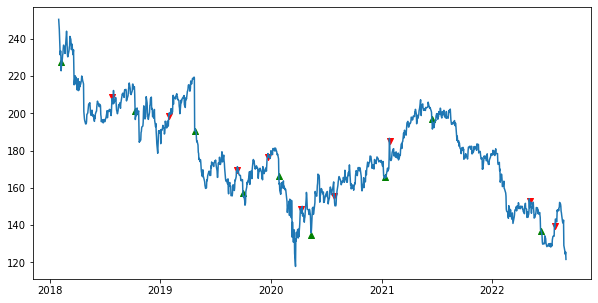

In [81]:
instances[0].plot_chart()

In [82]:
profits, comp_name = [],[]

for obj in instances:
    if not obj.df.empty:
        profits.append(obj.cumul_profit)
        comp_name.append(obj.symbol)

In [83]:
ret_frame = pd.DataFrame(profits,index=comp_name,columns=['cumul_ret'])

In [84]:
ret_frame.mean()

cumul_ret    0.337602
dtype: float64

In [85]:
ret_frame.nlargest(10,'cumul_ret')

,cumul_ret
CAH,2.814502
KLAC,2.587772
SNPS,2.032232
LLL,1.941585
DG,1.724944
AKAM,1.682340
HLT,1.679473
AZO,1.654232
CCI,1.616824
DRE,1.603439


In [89]:
tickers[tickers=='AAPL']

44    AAPL
dtype: object

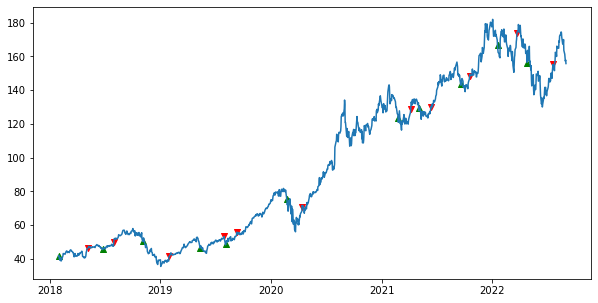

In [90]:
instances[44].plot_chart()

In [92]:
ret_frame.nsmallest(10,'cumul_ret')

,cumul_ret
NKTR,-0.891742
MAC,-0.766947
GT,-0.735877
PCG,-0.726077
APA,-0.723993
ALGN,-0.712077
BBWI,-0.707147
PARA,-0.703071
NFLX,-0.695973
CCL,-0.656235


In [93]:
tickers[tickers=='NKTR']

488    NKTR
dtype: object

In [97]:
instances[488].profit

array([-0.34452631, -0.02929177, -0.30244576, -0.07682362, -0.39190434,
        0.35135129, -0.01791048, -0.03749994,  0.03182578, -0.10253809,
       -0.10714285, -0.58860757])

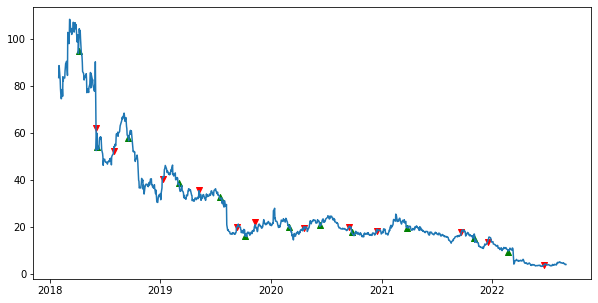

In [98]:
instances[488].plot_chart()